## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Question: Do advanced offensive metrics accurately reflect which position a soccer player most often plays?

In [222]:
#import initial packages

from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import re
from sklearn.model_selection import train_test_split

In [198]:
#Utilize Browser and Beautiful soup to open an examine web page with data

browser = Browser('chrome', headless = False) #headless to false makes a window pop up
link = url + '/player-xg-2019'
browser.visit(link)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [112]:
#Find hrefs relevant to advanced offensive metrics and positions

url = 'https://www.americansocceranalysis.com'

browser = Browser('chrome', headless = False) #headless to false makes a window pop up
link = url + '/player-xg-2019'
browser.visit(link)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


columns = []
for item in soup.find_all('div', class_ = 'tablesorter-header-inner'):
    columns.append(item.text)

import re
pattern = re.compile(r'player-xg-20')
pattern1 = re.compile(r'Player xG')
for item in soup.find_all('a', href = pattern, text = pattern1):
    print (item)

hrefs = ["/player-xg-2019", "/player-xg-2018", "/player-xg-2017"]



<a href="/player-xg-2019">Player xG 2019</a>
<a href="/player-xg-2018">Player xG 2018</a>
<a href="/player-xg-2017">Player xG 2017</a>
<a href="/player-xg-2018-1">Player xG Chain 2018</a>


In [140]:
# Obtain - Scrape for data

pages = []

for href in hrefs:
    browser = Browser('chrome', headless = False) #headless to false makes a window pop up
    link = url + href
    browser.visit(link)
    time.sleep(1) #helps with not getting banned
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    column_values = []
    for col_ind in range(len(columns)):
        column = []
        for row_ind in range(1, len(soup.find_all('tr', role = 'row'))):
            entry = soup.find_all('tr', role = 'row')[row_ind].find_all('td')[col_ind].text
            column.append(entry)
        column_values.append(column)
    pages.append(column_values)
    time.sleep(1) #helps with not getting banned

In [206]:
#Scrub data by removing blanks and converting strings to floats for
#quantitative columns

columns_to_exclude = [0,1,2,4]

full_columns = []
for col_index in range(len(columns)):
    col = []
    for page in pages:
        if col_index in exclude:
            for entry_index in range(len(page[0])):
                 col.append(page[col_index][entry_index])
        else:
            for entry_index in range(len(page[0])):
                entry = page[col_index][entry_index]
                if (entry == '') | (entry == ' '):
                    col.append(0)
                else:
                    col.append(float(entry))
    full_columns.append(col)    

In [255]:
#Create DataFrame

data_dict = {}
for index in range(len(columns)):
    data_dict[columns[index]] = full_columns[index]
data = pd.DataFrame(data_dict, columns = list(data_dict.keys()))

#Create DataFrames for features and target

features = data.drop(['First', 'Last', 'Team', 'Pos'], axis = 1)
target = data.Pos

#Check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 28 columns):
First        1579 non-null object
Last         1579 non-null object
Team         1579 non-null object
Min          1579 non-null float64
Pos          1579 non-null object
Sht          1579 non-null float64
SoT          1579 non-null float64
Solo         1579 non-null float64
G            1579 non-null float64
xG           1579 non-null float64
G-xG         1579 non-null float64
KP           1579 non-null float64
A            1579 non-null float64
xA           1579 non-null float64
A-xA         1579 non-null float64
xG+xA        1579 non-null float64
xPlace       1579 non-null float64
Shtp96       1579 non-null float64
SoTp96       1579 non-null float64
Gp96         1579 non-null float64
xGp96        1579 non-null float64
G-xGp96      1579 non-null float64
KPp96        1579 non-null float64
Ap96         1579 non-null float64
xAp96        1579 non-null float64
A-xAp96      1579 non-

In [220]:
#Scrub - Standardize feature values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

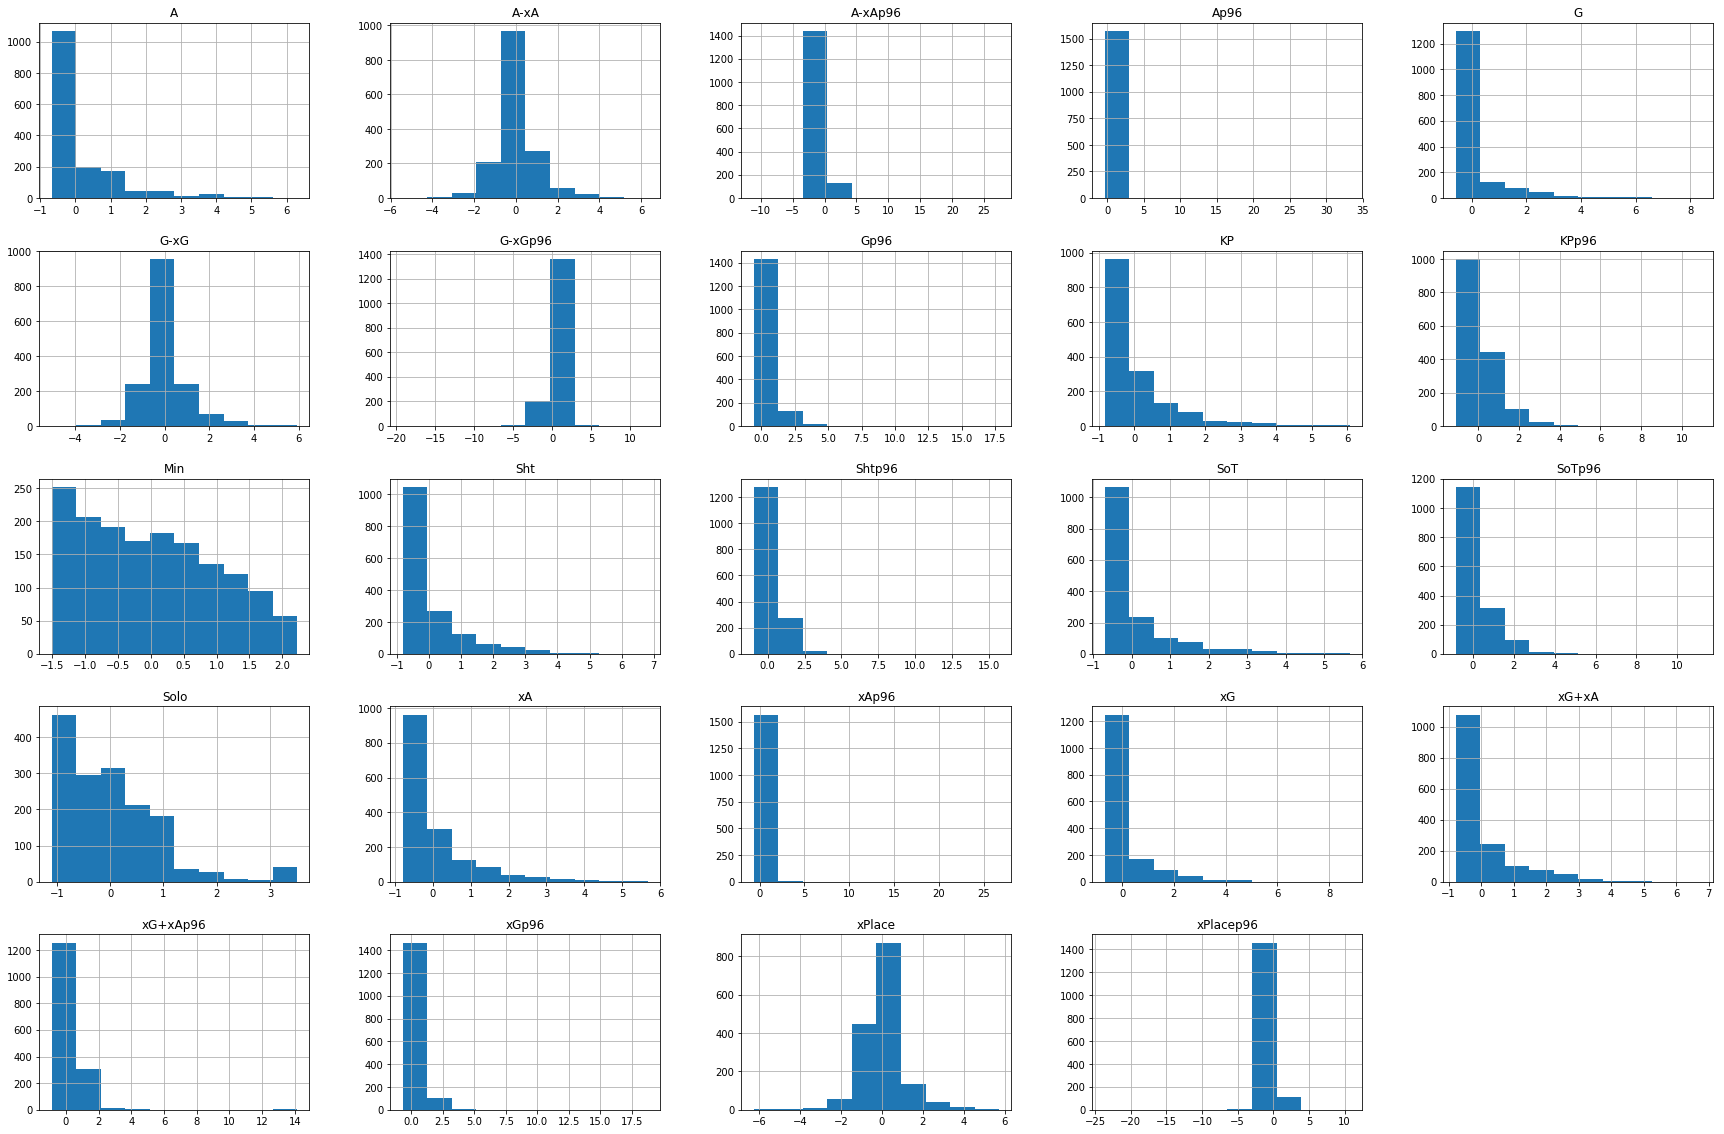

In [231]:
#Explore - examine visualizations

scaled_features.hist(figsize=(30,20));

#mostly not normal, but should be ok for classification

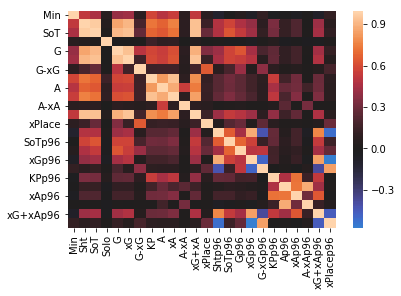

In [232]:
#Explore - examine correlations visualizations

import seaborn as sns
sns.heatmap(scaled_features.corr(), center=0);

#Too many features - use principal component analysis

In [235]:
#Conduct principal component analysis 
#Find appropriate number of components


from sklearn.decomposition import PCA
pca_1 = PCA(n_components=1)
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
pca_5 = PCA(n_components=5)
pca_6 = PCA(n_components=6)
pca_7 = PCA(n_components=7)
pca_8 = PCA(n_components=8)

principalComponents = pca_1.fit_transform(scaled_features)
principalComponents = pca_2.fit_transform(scaled_features)
principalComponents = pca_3.fit_transform(scaled_features)
principalComponents = pca_4.fit_transform(scaled_features)
principalComponents = pca_5.fit_transform(scaled_features)
principalComponents = pca_6.fit_transform(scaled_features)
principalComponents = pca_7.fit_transform(scaled_features)
principalComponents = pca_8.fit_transform(scaled_features)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))
print(np.sum(pca_4.explained_variance_ratio_))
print(np.sum(pca_5.explained_variance_ratio_))
print(np.sum(pca_6.explained_variance_ratio_))
#change in accuracy still about 5%
#accuracy over 80%

print(np.sum(pca_7.explained_variance_ratio_))
print(np.sum(pca_8.explained_variance_ratio_)) 



pca = PCA(n_components=6)
principalComponents = pca.fit_transform(scaled_features)

0.3663470159932549
0.5113753796371271
0.6252102532953068
0.7205682794880924
0.7777529771786581
0.8273464346371936
0.8698315614854085
0.9073626934188291


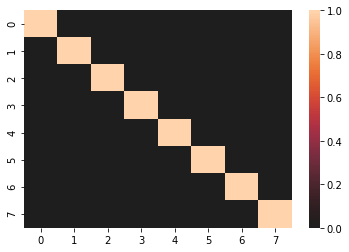

In [245]:
#Explore - review correlation map with PCA

sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

#Much improved

In [ ]:
#Create train and test splits

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size = .2, random_state = 123)

In [242]:
#Conduct Simple Classifications

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


pipe_svm = Pipeline([('pca', PCA(n_components=6)),
        ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([('pca', PCA(n_components=6)),
        ('clf', DecisionTreeClassifier(random_state=123))])

pipe_rf = Pipeline([('pca', PCA(n_components=6)),
        ('clf', RandomForestClassifier(random_state=123))])


pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))

Support Vector Machine pipeline test accuracy: 0.5284810126582279
Decision Tree pipeline test accuracy: 0.38924050632911394
Random Forest pipeline test accuracy: 0.5


/Users/dgoldstein24/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dgoldstein24/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [246]:


#Grid search to find best parameters


#SVM

from sklearn.model_selection import GridSearchCV

pipe_svm = Pipeline([('pca', PCA(n_components=6)),
            ('clf', svm.SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)





#Random Forest

# Construct pipeline
pipe_rf = Pipeline([('pca', PCA(n_components=6)),
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct pipeline
pipe_ab = Pipeline([('pca', PCA(n_components=6)),
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_ab.fit(X_train, y_train)






Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................


/Users/dgoldstein24/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.1s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.2s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   0.0s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   0.0s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.6s finished
/Users/dgoldstein24/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   35.8s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


/Users/dgoldstein24/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.3s finished


In [254]:
# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

Best accuracy for SVM 0.5676959619952494
Best params for SVM {'clf__C': 1, 'clf__kernel': 'linear'}

Best accuracy for Random Forest 0.5019794140934284
Best params for Random Forest {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.393507521773555
Best params for Adaboost {'clf__learning_rate': 0.5, 'clf__n_estimators': 30}


In [252]:
#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

pipe_svm_best = Pipeline([('pca', PCA(n_components=6)),
        ('clf', svm.SVC(C= 1, kernel = 'linear', random_state=123))])

pipe_svm_best.fit(X_train, y_train)

preds = pipe_svm_best.predict(X_test)

print(accuracy_score(y_test, preds))


0.5126582278481012
